In [55]:
import os
import xml.etree.ElementTree as ET
from collections import defaultdict, Counter
import pandas as pd
import re

In [56]:
# 📁 Chemin vers le dossier contenant les fichiers XML
XML_FOLDER = r"C:\Users\yomna\medical_xml_project\data\casimage_FR"  # ← change ce chemin


In [57]:
# 📊 Structures pour stocker les infos
field_counts = defaultdict(int)
field_types = defaultdict(Counter)
total_docs = 0


In [58]:
# 🧠 Fonction pour détecter le type de donnée d'un champ
def detect_type(value):
    value = value.strip()
    if value.isdigit():
        return "Entier"
    try:
        float(value)
        return "Nombre"
    except:
        pass
    # Vérifier si c'est une date au format dd.mm.yyyy
    if re.match(r"\d{2}\.\d{2}\.\d{4}", value):
        return "Date"
    # Vérifier si c'est une URL
    if value.startswith("http://") or value.startswith("https://"):
        return "URL"
    return "Texte"

In [59]:
OUTPUT_CSV = "xml_data.csv"
data_list = []   # Liste de dictionnaires (chaque XML = 1 ligne)
all_tags = set() # Pour garder la liste de toutes les balises rencontrées

In [60]:
# 📥 Lecture des fichiers XML
for filename in os.listdir(XML_FOLDER):
    if filename.endswith(".xml"):
        file_path = os.path.join(XML_FOLDER, filename)
        try:
            tree = ET.parse(file_path)
            root = tree.getroot()

            row_data = {}
            for child in root:
                tag = child.tag.strip()
                text = child.text.strip() if child.text else ""
                row_data[tag] = text
                all_tags.add(tag)

            # Ajouter le nom du fichier comme identifiant
            row_data["source_file"] = filename
            data_list.append(row_data)

        except Exception as e:
            print(f"⚠️ Erreur dans {filename} : {e}")


⚠️ Erreur dans case2746_fr.xml : undefined entity: line 13, column 36
⚠️ Erreur dans case2831_fr.xml : undefined entity: line 13, column 39
⚠️ Erreur dans case3038_fr.xml : undefined entity: line 49, column 29
⚠️ Erreur dans case3039_fr.xml : undefined entity: line 83, column 29
⚠️ Erreur dans case3041_fr.xml : undefined entity: line 107, column 39
⚠️ Erreur dans case3043_fr.xml : undefined entity: line 138, column 17
⚠️ Erreur dans case3044_fr.xml : undefined entity: line 141, column 17
⚠️ Erreur dans case3045_fr.xml : undefined entity: line 111, column 17
⚠️ Erreur dans case3046_fr.xml : undefined entity: line 76, column 29
⚠️ Erreur dans case3048_fr.xml : undefined entity: line 134, column 25
⚠️ Erreur dans case3050_fr.xml : undefined entity: line 42, column 25
⚠️ Erreur dans case3052_fr.xml : undefined entity: line 199, column 31
⚠️ Erreur dans case3053_fr.xml : undefined entity: line 173, column 31
⚠️ Erreur dans case3088_fr.xml : undefined entity: line 21, column 39
⚠️ Erreur dan

In [61]:
# ✅ Création du DataFrame final
df = pd.DataFrame(data_list)

# ➕ S'assurer que toutes les colonnes existent
for tag in all_tags:
    if tag not in df.columns:
        df[tag] = None

# 🧹 Réorganiser les colonnes (source_file en premier)
cols = ["source_file"] + [c for c in df.columns if c != "source_file"]
df = df[cols]

# 💾 Sauvegarde en CSV
df.to_csv(OUTPUT_CSV, index=False, encoding='utf-8-sig')
print(f"✅ Export terminé : {OUTPUT_CSV}")
print(f"📊 {len(df)} fichiers XML convertis en {len(df.columns)} colonnes.")
print("🔍 Aperçu :")
print(df.head())

✅ Export terminé : xml_data.csv
📊 1646 fichiers XML convertis en 40 colonnes.
🔍 Aperçu :
       source_file    ID Description  \
0  case1683_fr.xml  1683               
1  case1684_fr.xml  1684               
2  case1685_fr.xml  1685               
3  case1686_fr.xml  1686               
4  case1687_fr.xml  1687               

                                           Diagnosis Sex CaseID  \
0  Frottis sanguin périphérique normal\n(leucocytes)              
1                                        Hématocrite              
2                       Numération des réticulocytes              
3               Hématopoïèse normale - médullogramme              
4                                   Myélome multiple              

                                ClinicalPresentation Commentary  \
0  Il s'agit d'une donneuse de sang de 44 ans.\nS...              
1  Les éléments figurés du sang (globules\nrouges...              
2  Cas n* 1, images RETI-1 et RETI-2. Il s'agit\n...              

In [62]:
# 🧾 Préparer les données pour affichage
data_summary = []
for field in sorted(set(list(field_counts.keys()) + [c.tag for c in root])):
    filled = field_counts[field]
    fill_rate = (filled / total_docs) * 100 if total_docs else 0
    # Déterminer le type dominant
    most_common_type = field_types[field].most_common(1)[0][0] if field_types[field] else "Vide"
    data_summary.append({
        "Champ XML": field,
        "Type dominant": most_common_type,
        "Nb valeurs non vides": filled,
        "Taux de remplissage (%)": round(fill_rate, 2),
        "Autres types rencontrés": dict(field_types[field])
    })

In [63]:
# 🧮 Convertir en DataFrame
df = pd.DataFrame(data_summary)

In [64]:
# 📊 Trier par taux de remplissage décroissant
df = df.sort_values(by="Taux de remplissage (%)", ascending=False)

In [65]:
# 🖨️ Afficher les 10 premiers champs les plus remplis
print("\n📈 === Résumé des champs les plus remplis ===")
print(df.head(10).to_string(index=False))


📈 === Résumé des champs les plus remplis ===
   Champ XML Type dominant  Nb valeurs non vides  Taux de remplissage (%) Autres types rencontrés
         ACR          Vide                     0                        0                      {}
         Age          Vide                     0                        0                      {}
ODislocation          Vide                     0                        0                      {}
      OGraft          Vide                     0                        0                      {}
    OImplant          Vide                     0                        0                      {}
      OJoint          Vide                     0                        0                      {}
   OLocation          Vide                     0                        0                      {}
       OOpen          Vide                     0                        0                      {}
  OOperation          Vide                     0                        

In [66]:
# 🖨️ Afficher les 10 champs les moins remplis
print("\n📉 === Résumé des champs les moins remplis ===")
print(df.tail(10).to_string(index=False))


📉 === Résumé des champs les moins remplis ===
           Champ XML Type dominant  Nb valeurs non vides  Taux de remplissage (%) Autres types rencontrés
ClinicalPresentation          Vide                     0                        0                      {}
            Creation          Vide                     0                        0                      {}
                  ID          Vide                     0                        0                      {}
                Date          Vide                     0                        0                      {}
            DateTime          Vide                     0                        0                      {}
          Department          Vide                     0                        0                      {}
         Description          Vide                     0                        0                      {}
           Diagnosis          Vide                     0                        0                      {}

In [67]:
# 💾 Exporter le résumé complet dans un fichier Excel ou CSV
df.to_csv("resume_donnees_medicales.csv", index=False)

In [68]:
print(f"\n✅ Analyse terminée ! Résumé sauvegardé dans 'resume_donnees_medicales.csv'")
print(f"📄 Nombre total de documents analysés : {total_docs}")
print(f"🧾 Nombre total de champs détectés : {len(df)}")


✅ Analyse terminée ! Résumé sauvegardé dans 'resume_donnees_medicales.csv'
📄 Nombre total de documents analysés : 0
🧾 Nombre total de champs détectés : 36


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# 📥 Charger le CSV obtenu
csv_path = "xml_data.csv" 
df = pd.read_csv(csv_path)

In [80]:
# 🧩 1️⃣ Exploration générale
print("=== 🧾 Aperçu du DataFrame ===")
df.head()



=== 🧾 Aperçu du DataFrame ===


,source_file,ID,Description,Diagnosis,Sex,CaseID,ClinicalPresentation,Commentary,KeyWords,Anatomy,...,ODislocation,OPolytrauma,OOpen,OPathologic,OOperation,OGraft,QCM,WEBURL,LINK,WEBLINK
0,case1683_fr.xml,1683,NaN,Frottis sanguin périphérique normal\n(leucocytes),NaN,NaN,Il s'agit d'une donneuse de sang de 44 ans.\nS...,NaN,"globules blancs, leucocytes, globules rouges, ...",NaN,...,0,0,0,0,NaT,0,NaN,http://129.195.254.38:5000/4DMETHOD/_HTML_MCas...,NaN,NaN
1,case1684_fr.xml,1684,NaN,Hématocrite,NaN,NaN,Les éléments figurés du sang (globules\nrouges...,NaN,Hématocrite,NaN,...,0,0,0,0,NaT,0,NaN,http://129.195.254.38:5000/4DMETHOD/_HTML_MCas...,NaN,NaN
2,case1685_fr.xml,1685,NaN,Numération des réticulocytes,NaN,NaN,"Cas n* 1, images RETI-1 et RETI-2. Il s'agit\n...",NaN,"Réticulocytes, anémie hémolytique, anémie arég...",NaN,...,0,0,0,0,NaT,0,NaN,http://129.195.254.38:5000/4DMETHOD/_HTML_MCas...,NaN,NaN
3,case1686_fr.xml,1686,NaN,Hématopoïèse normale - médullogramme,NaN,NaN,Il s'agit d'un patient en très bonne santé.\nL...,NaN,"érythroïpoïèse, myélopoïèse, plasmocytes, hist...",NaN,...,0,0,0,0,NaT,0,NaN,http://129.195.254.38:5000/4DMETHOD/_HTML_MCas...,NaN,NaN
4,case1687_fr.xml,1687,NaN,Myélome multiple,NaN,NaN,"Il s'agit d'un patient de 40 ans, chez qui un\...",NaN,"Myélome multiple, plasmocytes, rouleaux\néryth...",NaN,...,0,0,0,0,NaT,0,NaN,http://129.195.254.38:5000/4DMETHOD/_HTML_MCas...,NaN,NaN


In [81]:
print("\n=== 📊 Informations générales ===")
df.info()


=== 📊 Informations générales ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   source_file           1646 non-null   object        
 1   ID                    1646 non-null   int64         
 2   Description           1620 non-null   object        
 3   Diagnosis             1645 non-null   object        
 4   Sex                   0 non-null      float64       
 5   CaseID                694 non-null    float64       
 6   ClinicalPresentation  1390 non-null   object        
 7   Commentary            1428 non-null   object        
 8   KeyWords              211 non-null    object        
 9   Anatomy               502 non-null    object        
 10  Chapter               944 non-null    object        
 11  ACR                   903 non-null    object        
 12  References            311 non-null    obje

In [73]:
print("\n=== 📈 Statistiques descriptives ===")
print(df.describe(include='all'))


=== 📈 Statistiques descriptives ===
            source_file           ID  \
count              1646  1646.000000   
unique             1646          NaN   
top     case1683_fr.xml          NaN   
freq                  1          NaN   
mean                NaN  3170.620292   
std                 NaN   621.736784   
min                 NaN  1683.000000   
25%                 NaN  2623.250000   
50%                 NaN  3117.500000   
75%                 NaN  3764.750000   
max                 NaN  4239.000000   

                                              Description  \
count                                                1620   
unique                                               1542   
top     Les descriptions des images se retrouvent en o...   
freq                                                    9   
mean                                                  NaN   
std                                                   NaN   
min                                                   N

C:\Users\yomna\AppData\Local\Temp\ipykernel_6812\3793367738.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Champ', x='Taux de remplissage (%)', data=fill_df, palette='viridis')


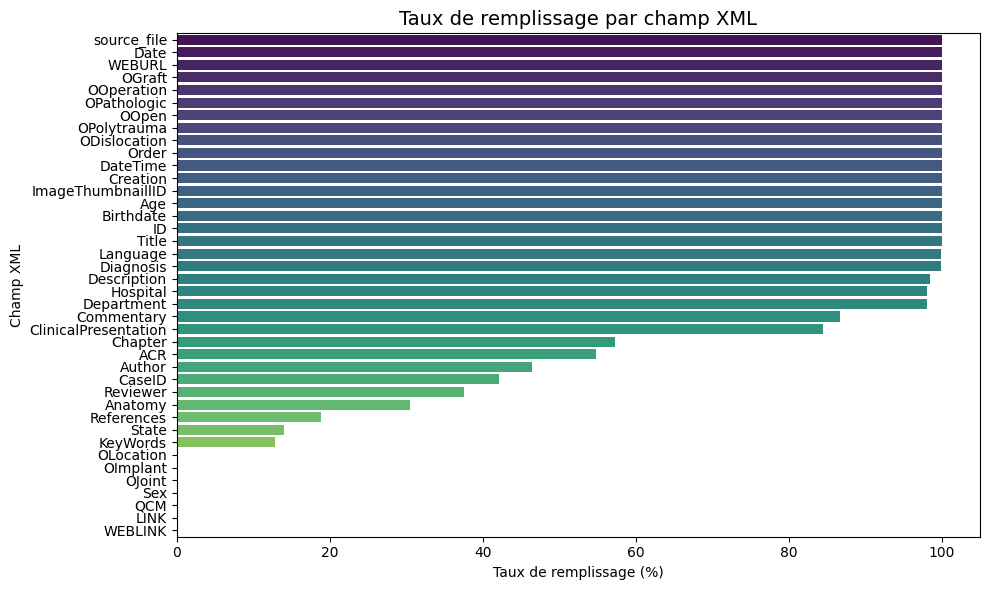

In [74]:
# 🧹 2️⃣ Taux de remplissage
# ==========================
missing_rate = df.isnull().mean() * 100
fill_rate = 100 - missing_rate
fill_df = fill_rate.reset_index()
fill_df.columns = ['Champ', 'Taux de remplissage (%)']
fill_df = fill_df.sort_values(by='Taux de remplissage (%)', ascending=False)

# 🔹 Visualisation du taux de remplissage
plt.figure(figsize=(10, 6))
sns.barplot(y='Champ', x='Taux de remplissage (%)', data=fill_df, palette='viridis')
plt.title("Taux de remplissage par champ XML", fontsize=14)
plt.xlabel("Taux de remplissage (%)")
plt.ylabel("Champ XML")
plt.tight_layout()
plt.show()

In [75]:
# 🧠 3️⃣ Types de colonnes
# ==========================
print("\n=== 🔍 Types de colonnes détectés ===")
for col in df.columns:
    dtype = df[col].dtype
    print(f"{col}: {dtype}")


=== 🔍 Types de colonnes détectés ===
source_file: object
ID: int64
Description: object
Diagnosis: object
Sex: float64
CaseID: float64
ClinicalPresentation: object
Commentary: object
KeyWords: object
Anatomy: object
Chapter: object
ACR: object
References: object
Author: object
Reviewer: object
Hospital: object
Department: object
State: object
Date: object
Language: object
Title: object
Birthdate: object
Age: int64
ImageThumbnaillID: int64
Creation: object
DateTime: object
Order: int64
OJoint: object
OLocation: object
OImplant: object
ODislocation: int64
OPolytrauma: int64
OOpen: int64
OPathologic: int64
OOperation: object
OGraft: int64
QCM: float64
WEBURL: object
LINK: float64
WEBLINK: float64



=== 🔢 Nombre de valeurs uniques par champ ===
source_file             1646
WEBURL                  1646
ID                      1646
Description             1542
Diagnosis               1419
Commentary              1305
ClinicalPresentation    1303
ImageThumbnaillID        916
CaseID                   658
ACR                      636
DateTime                 375
References               234
Chapter                  183
KeyWords                 174
Creation                 133
Order                    124
Anatomy                  122
Age                       93
Author                    62
Title                     41
Reviewer                  22
Date                      10
State                      4
Department                 4
OOperation                 2
OLocation                  2
Language                   1
OPolytrauma                1
OGraft                     1
OPathologic                1
OOpen                      1
ODislocation               1
Birthdate                

C:\Users\yomna\AppData\Local\Temp\ipykernel_6812\3839613649.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.head(10).values, y=unique_counts.head(10).index, palette='magma')


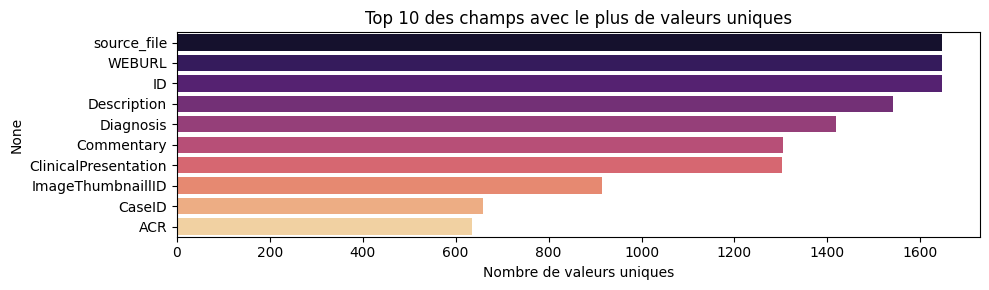

In [76]:
# 📊 4️⃣ Analyse des valeurs uniques
# ==========================
unique_counts = df.nunique().sort_values(ascending=False)
print("\n=== 🔢 Nombre de valeurs uniques par champ ===")
print(unique_counts)

# 🔹 Visualiser les 10 champs les plus variés
plt.figure(figsize=(10, 3))
sns.barplot(x=unique_counts.head(10).values, y=unique_counts.head(10).index, palette='magma')
plt.title("Top 10 des champs avec le plus de valeurs uniques")
plt.xlabel("Nombre de valeurs uniques")
plt.tight_layout()
plt.show()

WEBLINK                 1.000000
LINK                    1.000000
Sex                     1.000000
QCM                     1.000000
OJoint                  0.999392
OOperation              0.999392
OImplant                0.999392
OLocation               0.998785
KeyWords                0.871810
State                   0.860267
References              0.811057
Anatomy                 0.695018
Reviewer                0.625152
CaseID                  0.578372
Author                  0.535237
ACR                     0.451397
Chapter                 0.426488
ClinicalPresentation    0.155529
Commentary              0.132442
Creation                0.026124
Department              0.019441
Hospital                0.019441
Description             0.015796
Language                0.000608
Diagnosis               0.000608
dtype: float64


c:\Users\yomna\medical_xml_project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129532 (\N{BAR OF SOAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


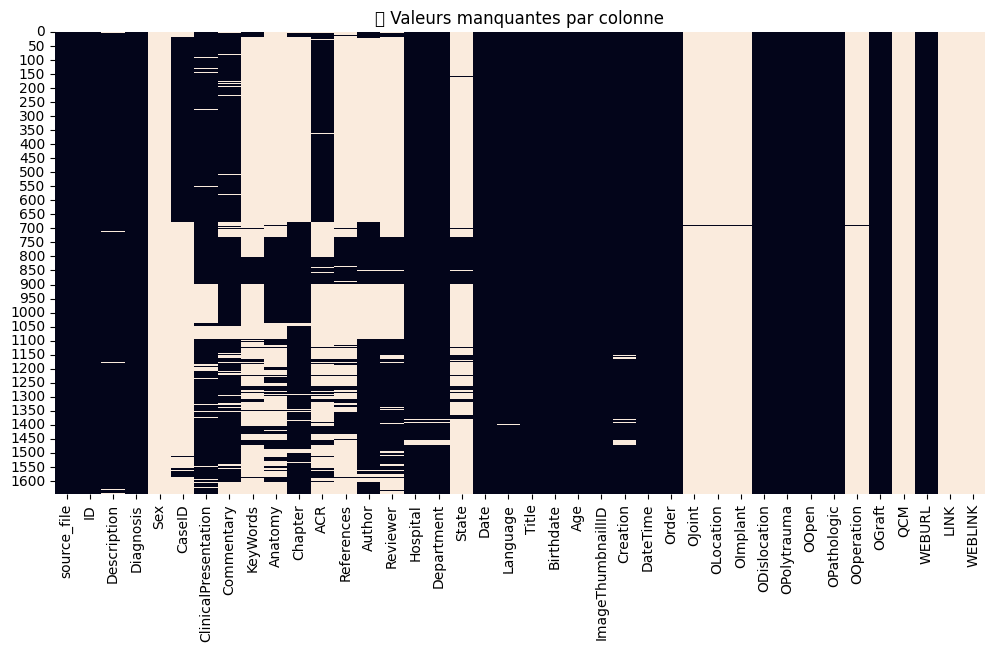

In [82]:
missing = df.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0])  # colonnes avec valeurs manquantes

# Visualisation graphique des colonnes manquantes
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("🧼 Valeurs manquantes par colonne")
plt.show()

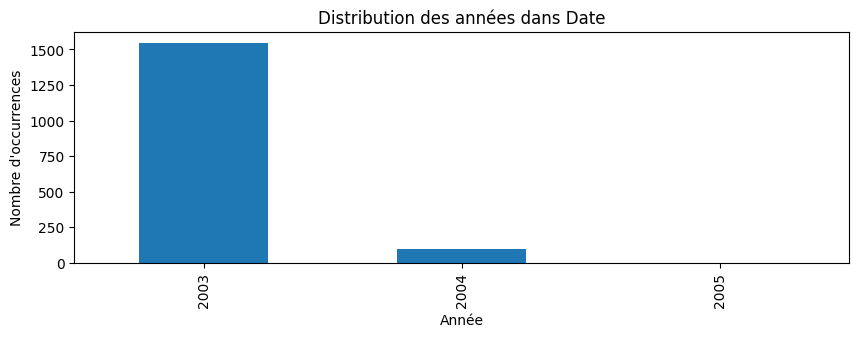

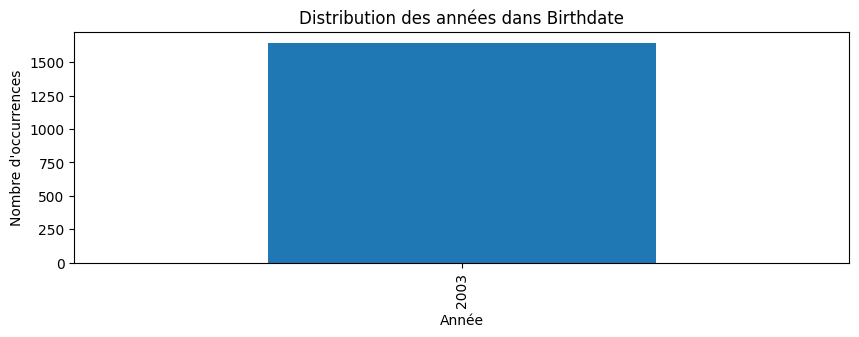

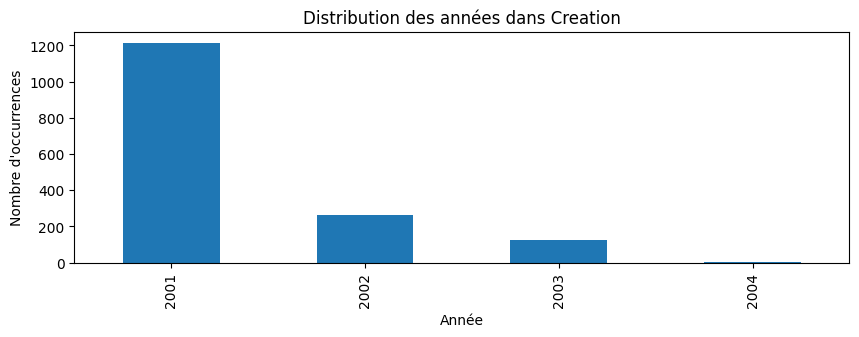

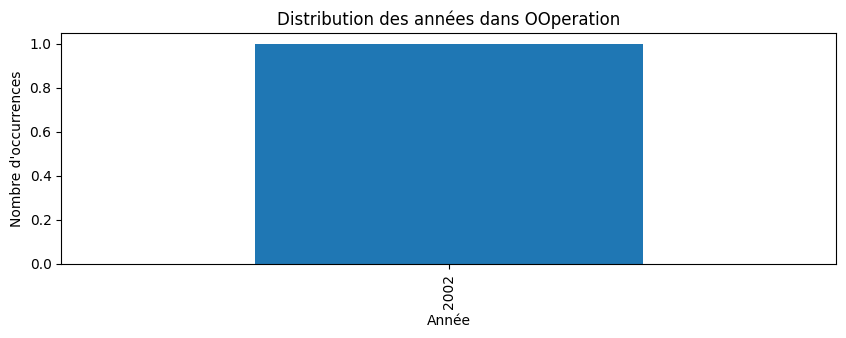

In [ ]:
# 📅 5️⃣ Analyse temporelle (si dates présentes)
date_cols = [col for col in df.columns if df[col].astype(str).str.match(r'\d{2}\.\d{2}\.\d{4}').any()]
if date_cols:
    for col in date_cols:
        try:
            df[col] = pd.to_datetime(df[col], format='%d.%m.%Y', errors='coerce')
        except:
            pass

    for col in date_cols:
        plt.figure(figsize=(10, 3))
        df[col].dropna().dt.year.value_counts().sort_index().plot(kind='bar')
        plt.title(f"Distribution des années dans {col}")
        plt.xlabel("Année")
        plt.ylabel("Nombre d'occurrences")
        plt.show()
else:
    print("⏳ Aucun champ de date détecté pour l'analyse temporelle.")


c:\Users\yomna\medical_xml_project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


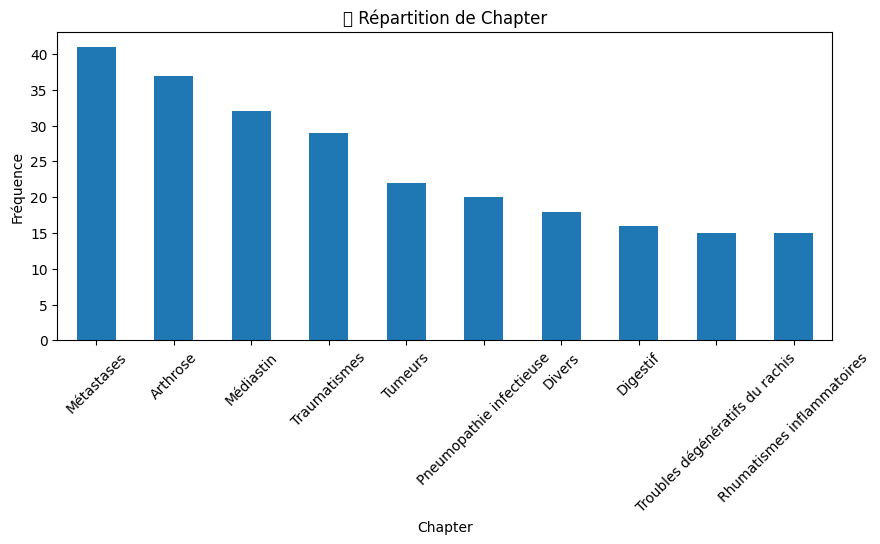

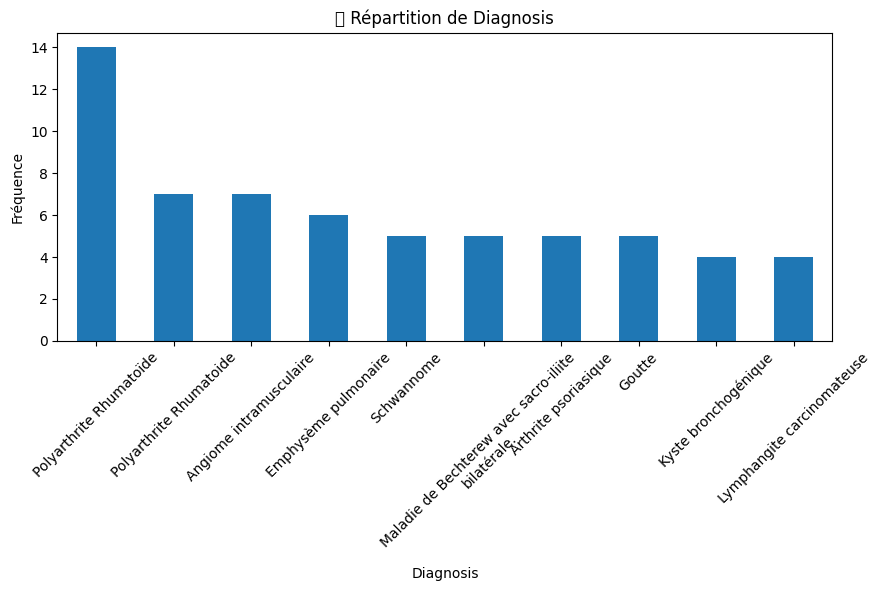

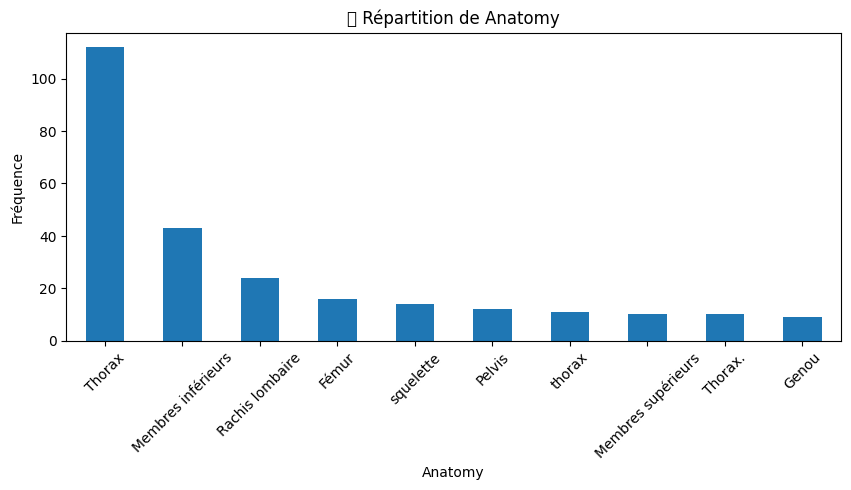

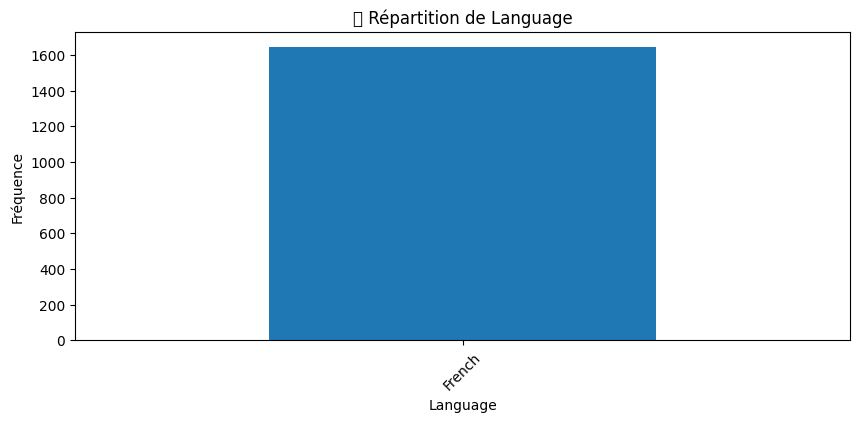

In [84]:
# 🏥 6️⃣ Analyse textuelle simple
categorical_cols = ["Chapter","Diagnosis","Anatomy","Language"]

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"📊 Répartition de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.xticks(rotation=45)
plt.show()

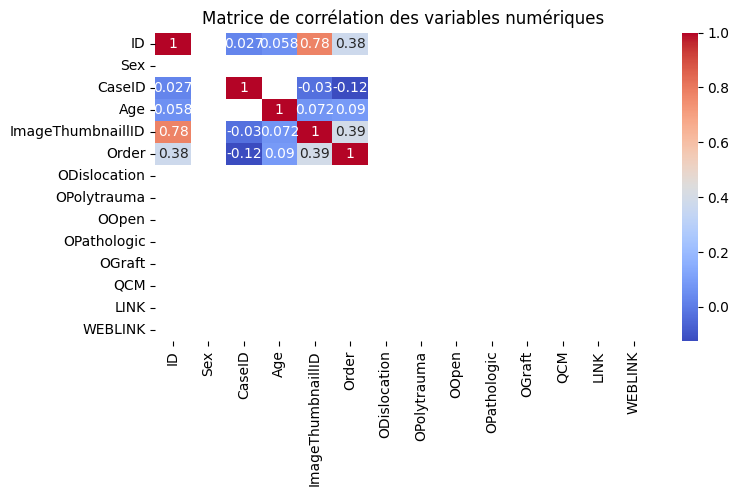

In [79]:
# 🔗 7️⃣ Corrélations (numériques)
# ==========================
numeric_df = df.select_dtypes(include=['int64', 'float64'])
if not numeric_df.empty:
    plt.figure(figsize=(8, 4))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Matrice de corrélation des variables numériques")
    plt.show()
else:
    print("📉 Pas de colonnes numériques pour la corrélation.")